# Машинное обучение, DS-поток
## Задание ML.1

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 80 баллов.

----

In [1]:
# Bot check

# HW_ID: ds_ml1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


sns.set(palette='Set2')

from sklearn.base import BaseEstimator

---
## Задача 1.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для Ridge-регрессии. Что можно сказать о влиянии параметра регуляризации?

Пусть $F(\theta) = ||Y - X\theta||^2$

Обозначим $R(\theta) = \lambda ||\theta||^2 \Rightarrow \partial R(\theta) = 2 \lambda \theta$

Тогда $\nabla F(\theta) = -2X^T(Y - X\theta)$

С лекции: $\theta_{k+1} = prox_{\mu R(\theta_k)}(\theta_k - \mu \nabla F(\theta_k))$

Из лекции знаем, $u := prox_{f}(p) \Leftrightarrow p - u \in \partial f(u)$

Подставляя, получаем $p - u = 2\lambda \mu u \Rightarrow u = \frac{p}{1 + 2\mu \alpha} \Rightarrow prox_{\mu||.||^2}(p) = \frac{p}{1 + 2\mu \alpha}$
Подстановкой, получаем конечный ответ:
$$
\theta_{k+1} = \frac{1}{1 + 2\mu \alpha}(\theta_k + \mu \nabla F(\theta_k)) = \frac{1}{1 + 2\mu \alpha}(\theta_k + 2\mu X^T(Y - X\theta_k))
$$

Ясно, что слишком большой параметр регуляризации является барьером, который не позволяет выходить из определенного диапазона, а значит такой метод обучения дает меньше выбросов, т.е. является более инертным.

---
## Задача 2.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

Elastic-регрессия имеет вид $F(\theta) = ||Y - X\theta||^2 + \lambda_1||\theta||_1 + \lambda_2||\theta||^2$

Основываясь на этом выполним пункт 1. Будем рассматривать случай, когда $\theta = (\theta_1, \theta_2)$

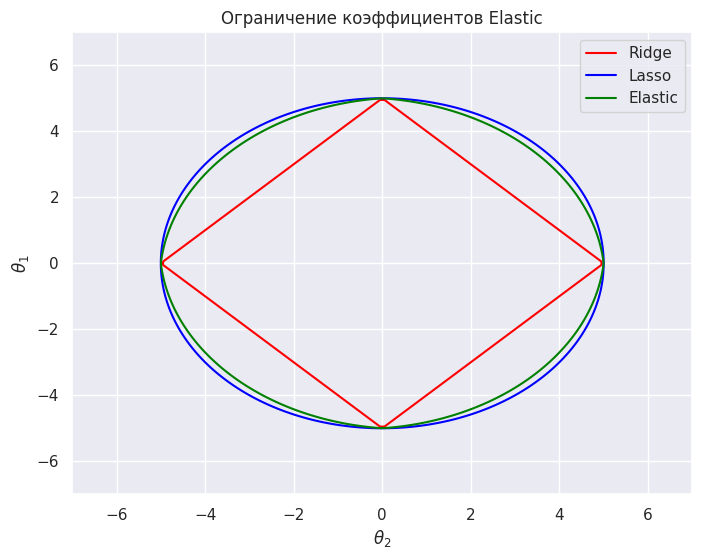

In [3]:
import matplotlib.lines as mlines

theta1 = np.linspace(-5, 5, 100)
theta2 = np.linspace(-5, 5, 100)

alpha1 = 1
alpha2 = 1
T1, T2 = np.meshgrid(theta1, theta2)

Ridge_constraint = np.abs(T1) + np.abs(T2)
Lasso_constraint = T1 ** 2 + T2 ** 2
Elastic_constraint = alpha1 * Ridge_constraint + alpha2 * Lasso_constraint

plt.figure(figsize=(8, 6))

Ridge_contour = plt.contour(T1, T2, Ridge_constraint, levels=1, colors="red")
Lasso_contour = plt.contour(T1, T2, Lasso_constraint, levels=1, colors="blue")
Elastic_contour = plt.contour(T1, T2, Elastic_constraint, levels=1, colors="green")

red_line = mlines.Line2D([], [], color='red', label='Ridge')
blue_line = mlines.Line2D([], [], color='blue', label='Lasso')
green_line = mlines.Line2D([], [], color='green', label='Elastic')
plt.legend(handles=[red_line, blue_line, green_line])

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.title('Ограничение коэффициентов Elastic')
plt.xlabel('$\\theta_2$')
plt.ylabel('$\\theta_1$')
plt.show()

**2.** Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор.

Какой вы можете видеть эффект при изменении параметра регуляризации и в чем
его отличие от лассо-регрессии?

Выполним пункт 2.
Имеем функцию $f(\theta) = ||Y - X\theta||^2 + \lambda_1||\theta||_1 + \lambda_2||\theta||^2$.

Пусть $F(\theta) = ||Y - X\theta||^2$, $R(\theta) = \lambda_1||\theta||_1 + \lambda_2||\theta||^2$

$\partial R(\theta) = 2\lambda_2 \theta + z$, где $z = \lambda_1 \ при \ \theta > 0$, $z = -\lambda_1 \ при \ \theta < 0$ и $z \in [-\lambda_1, \lambda_1] \ при \ \theta = 0$

$\hat \theta - минимум \Leftrightarrow \hat \theta = prox_{R(\theta)}(\theta - \nabla F(\theta))$

Из лекции знаем, $u := prox_{f}(p) \Leftrightarrow p - u \in \partial f(u)$

У нас $u = prox_{R(\theta)}(\theta - \nabla F(\theta))$

$p = \theta - \nabla F(\theta)$

$f = R(\theta)$

1) $\theta_k <  0 $

$p - u = 2\lambda_2 u + \lambda_1$

Откуда $u = \frac{p - \lambda_1}{1 + 2\lambda_2} \Rightarrow \theta_{k+1} = \frac{\theta_k - \nabla F(\theta_k) - \lambda_1}{1 + 2\lambda_2}$

2) $\theta_k = 0$

$p - u \in 2\lambda_2 u + z$, где $z \in [-\lambda_1, \lambda_1]$

Откуда $u \in \frac{p - z}{1 + 2\lambda_2} \Rightarrow \theta_{k+1} \in \frac{ - \nabla F(0) - z}{1 + 2\lambda_2}$

3) $\theta_k > 0$

$p - u = 2\lambda_2 u - \lambda_1$

Откуда $u = \frac{p + \lambda_1}{1 + 2\lambda_2} \Rightarrow \theta_{k+1} = \frac{\theta_k - \nabla F(\theta_k) + \lambda_1}{1 + 2\lambda_2}$

**3.** Выпишите формулы для градиентного и стохастического спуска

Осталось выписать шаг GD и SGD. 

GD: $\theta_{k+1} = \theta_k - \eta (-2X^T(Y-X\theta_k) + 2\lambda_1\theta_k + \lambda_2 \cdot sign(\theta_k))$

SGD: $\theta_{k+1} = \theta_k - \eta(-2X^T_m(Y_m-X_m\theta_k) + 2\lambda_1\theta_k + \lambda_2 \cdot sign(\theta_k))$

где $\eta$ -- параметр обучения, а $X_m$ и $Y_m$ обозночает случайную подвыборку размера m из X и Y соответственно.

---
## Задача 3.

Вам предлагается сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [4]:
data = pd.read_csv('cost-of-living-2018.txt', sep='\t')
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]

data.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index,Groceries Index
0,145.43,110.87,128.76,158.75,112.26,143.47
1,141.25,66.14,105.03,135.76,142.70,149.86
2,134.83,71.70,104.38,129.74,130.96,138.98
3,130.68,49.68,91.61,127.22,139.01,127.54
4,128.03,43.57,87.30,119.48,112.71,132.70


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

Не будем учитыввать столбец "Cost of Living Plus Rent Index", так как он очевидно линейно зависит от первых двух.

In [5]:
X = data[
    [
        "Cost of Living Index",
        "Rent Index",
        "Restaurant Price Index",
        "Local Purchasing Power Index",
    ]
]
Y = pd.DataFrame(data["Groceries Index"])
X.shape

(540, 4)

Видим, что d = 5

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [6]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** Чтобы избежать влияния размерностей различных величин. Действительно, ведь признаки числовое значение которых больше получают преимущество при подсчете нормы. Но мы не можем заранее знать какие признаки важней, поэтому необходимо их стандартизировать.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, **обученный на обучающей выборке**.

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

In [8]:
def draw_track(
    model, X, y, log_min, log_max, num, title="", elastic_flag=False, figsize=(12, 6)
):
    """Данная функция строит график зависимости значений
    коэффициентов модели от параметра регуляризации.

    :param model: модель
    :param X: регрессоры
    :param y: отклик
    :param log_min: десятичный логарифм
        минимального значения коэффициента регуляризации
    :param log_max: десятичный логарифм
        максимального значения коэффициента регуляризации
    :param num: количество элементов в сетке для коэффициента регуляризации
    :param title: заголовок графика
    :param figsize: размер полотна
    """
    coefs = []
    if elastic_flag:
        l1_ratios = np.linspace(log_min, log_max, num)
        for tmp_ratio in l1_ratios:
            model.set_params(l1_ratio=tmp_ratio)
            model.fit(X, y)
            coefs.append(model.coef_)
    else:
        alphas = np.logspace(log_min, log_max, num)
        for a in alphas:
            if "l1_ratio" in model.get_params():
                # равномерно распределим alpha по обоим коэффициентам
                a *= 3 / 2
                model.set_params(alpha=a)
            else:
                model.set_params(alpha=a)
            model.fit(X, y)
            coefs.append(model.coef_)
    plt.figure(figsize=figsize)
    ax = plt.gca()
    #     ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        if coef.shape[0] == 1:
            coef = coef[0]
        label = r"$\theta_{" + str(ind) + "}$"
        if elastic_flag:
            ax.plot(l1_ratios, coef, linewidth=2, label=label)
        else:
            ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1

    ax.set_xscale("log")
    #     ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    x_label = 'alpha'
    if elastic_flag:
        x_label = "l1_ratio"
    plt.xlabel(x_label, fontsize=19)
    plt.ylabel("weights", fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc="upper left", fontsize=15)
    plt.axis("tight")
    plt.show()

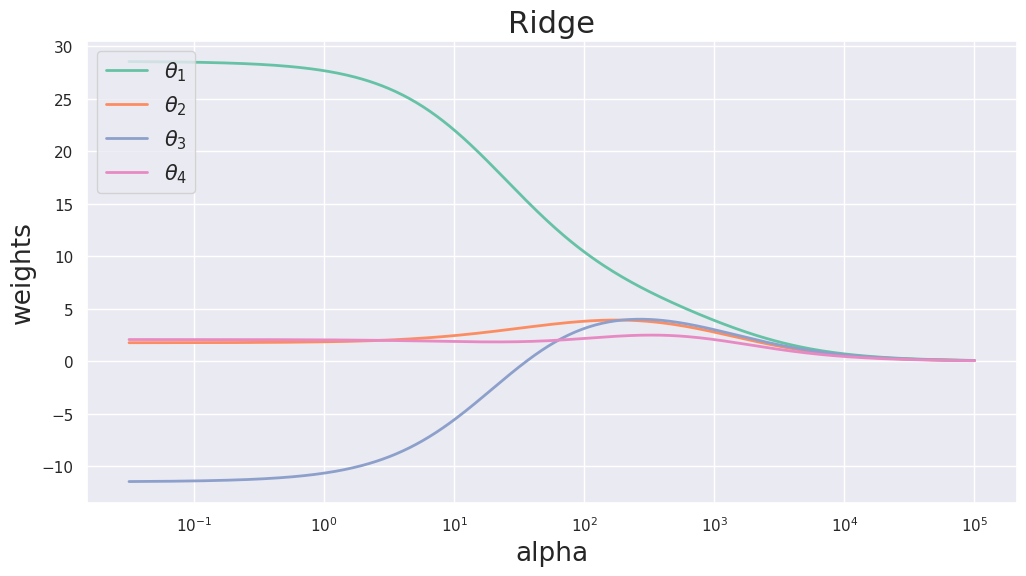

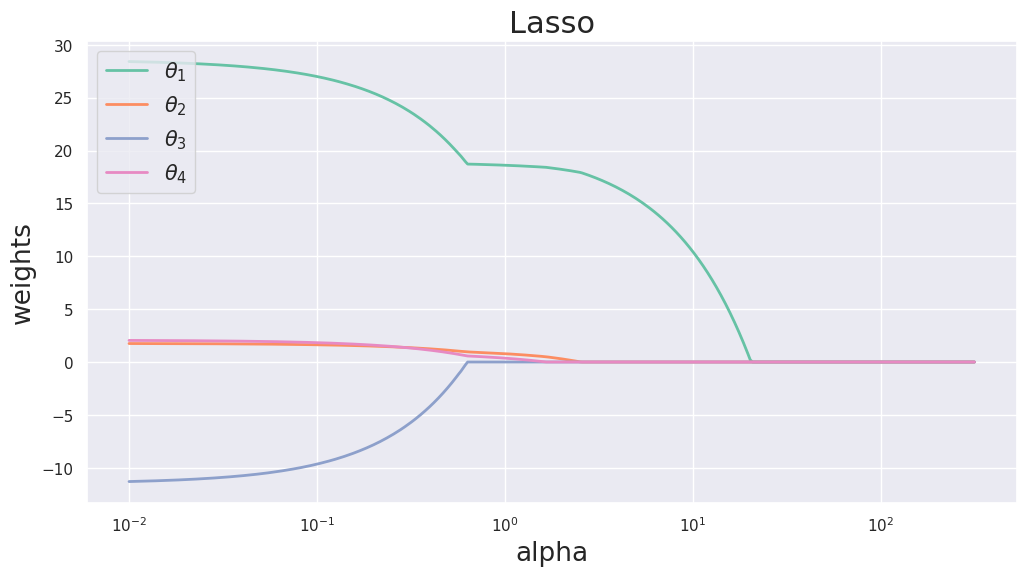

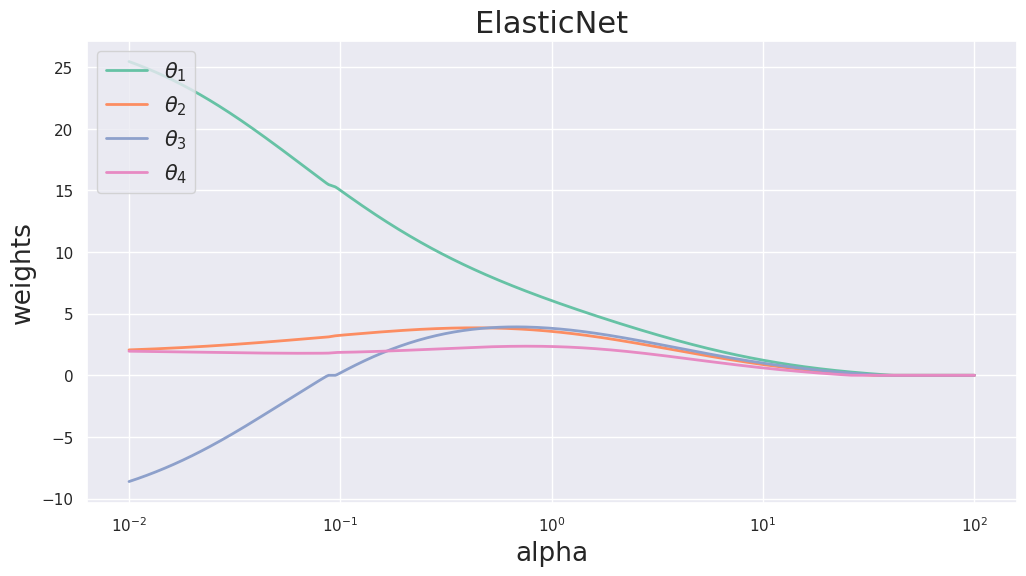

In [9]:
draw_track(Ridge(fit_intercept=False), X_train, Y_train, -1.5, 5, X_train.shape[0], 
           title='Ridge')

draw_track(Lasso(fit_intercept=False), X_train, Y_train, -2, 2.5, X_train.shape[0], 
           title='Lasso')

draw_track(ElasticNet(fit_intercept=False, l1_ratio=1/3), X_train, Y_train, -2, 2, X_train.shape[0], 
           title='ElasticNet')

Как видим, с увеличением alpha во всех трех случаях веса зануляются. Причем, если в Ridge и Elastic регрессии это происходит относительно плавно, то Lasso регрессии убывание скачкообразное, что вызавно использованной там L1 нормой.

Диаппазоны имеет смысл выбирать такие, чтобы большинство весов в нем не были равны нули. Действительно, ведь мы ожидаем, что итоговый ответ зависит от большинства параметров. По аналогичной причине нет смысла рассматривать промежутки, где веса оборачиваются константами независимо от значения $\alpha$. Это говорит о том что регрессия никак не повлияла на обучение, то есть мы не избавились от мультиколлинеарности.

$\alpha_{Ridge}$ = [1, 1000]

$\alpha_{Lasso}$ = [0.01, 1]

$\alpha_{Elastic}$ = [0.01, 10]

Теперь построим зависимость весов от l1_ratio для Elastic регрессии

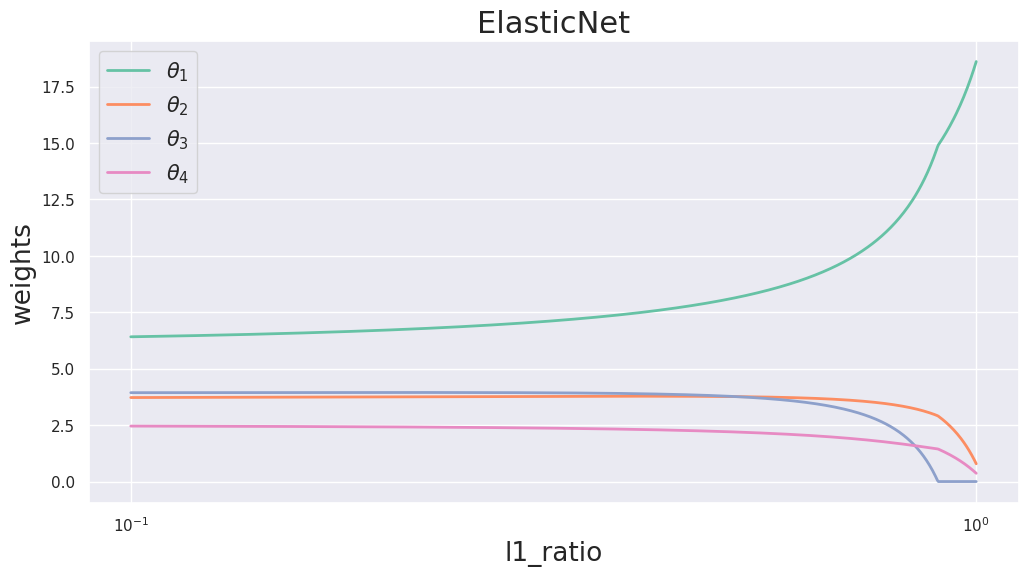

In [10]:
draw_track(ElasticNet(fit_intercept=False), X_train, Y_train, 0.1, 1, X_train.shape[0], 
           title='ElasticNet', elastic_flag=True)

Как видим, веса начинают резко изменяться с приближением $\alpha$ к единицe. Это неудивительно, ведь в таком случае большую роль играет Lasso регрессия, при которой веса меняются резко.

Расчитайте индекс обусловленности для МНК-решения. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [11]:
eigenvalues = np.linalg.eig(X_train.T @ X_train).eigenvalues
CN = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
CN 


np.float64(7.3836990665183695)

Как видим число обусловленности достаточно большое, значит скорее всего имеет место мультиколлинеарность.

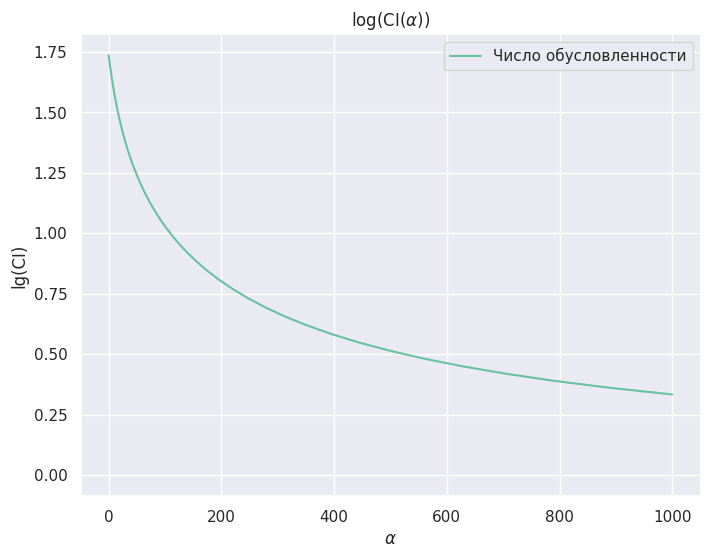

In [12]:
def compute_condition_number(X):
    eigenvalues = np.linalg.eigvals(X.T @ X)
    condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
    return condition_number


def get_condtion_numbers_ridge(X, Y, alphas):
    condtion_numbers = []

    for alpha in alphas:
        ridge = Ridge(alpha=alpha, fit_intercept=False)
        ridge.fit(X, Y)

        XTX = X.T @ X + alpha * np.eye(X.shape[1])
        CI = compute_condition_number(XTX)
        condtion_numbers.append(CI)
    return condtion_numbers


alphas = []
for alpha in np.logspace(-2, 3, 100):
    alphas.append(alpha)

condition_numbers = get_condtion_numbers_ridge(X_train, Y_train, alphas)

plt.figure(figsize=(8, 6))
plt.plot(alphas, np.log(condition_numbers) / np.log(10), label="Число обусловленности")
plt.xlabel(r"$\alpha$")
plt.ylabel("lg(CI)")
plt.axhline(0, alpha=1, linewidth=0)  # Ось Ox
plt.axvline(0, alpha=1, linewidth=0)  # Ось Oy
plt.title(r"log(CI($\alpha$))")
plt.legend()
plt.grid(True)
plt.show()

Заметим, что при $\alpha$ > 200. Число обусловленности становится меньше 10, но вместе с тем и зануляются большинство весов. 

**3.** На обучающей выборке с помощью поиска по сетке определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой. Вам может помочь [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Используйте его в качестве аргумента model

In [13]:
parameters_grid = {
    "alpha": np.linspace(0.00001, 2, num=1000),
}

models = {
    "Ridge": (Ridge(), {"model__alpha": np.logspace(-4, 2, num=1000)}),
    "Lasso": (Lasso(), {"model__alpha": np.logspace(-4, 2, num=1000)}),
    "Elastic": (
        ElasticNet(),
        {
            "model__alpha": np.logspace(-4, 2, num=200),
            "model__l1_ratio": np.linspace(0.01, 0.05, num=5),
        },
    ),
}

best_params = {}

for model_name, (model, params) in models.items():
    ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
    pipe = Pipeline([("scaler", StandardScaler()), ("model", model)])

    gs = GridSearchCV(pipe, params, scoring="neg_mean_squared_error", cv=ss, n_jobs=-1)

    gs.fit(X_train, Y_train)

    # print("Лучшие параметры для %s:" % (model_name), gs.best_params_)
    best_params[model_name] =  gs.best_params_

In [14]:
for model_name, (params) in best_params.items():
    print("Лучшие параметры для %s:" % (model_name), params)

Лучшие параметры для Ridge: {'model__alpha': np.float64(0.0001)}
Лучшие параметры для Lasso: {'model__alpha': np.float64(0.0001)}
Лучшие параметры для Elastic: {'model__alpha': np.float64(0.0001), 'model__l1_ratio': np.float64(0.05)}


На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

In [15]:
model = 0
scaler = StandardScaler()
X_valid = scaler.fit_transform(X_valid)

for model_name, (params) in best_params.items():
    if model_name == "Ridge":
        model = Ridge(alpha=params["model__alpha"], max_iter=1000, fit_intercept=True)
    elif model_name == "Lasso":
        model = Lasso(alpha=params["model__alpha"], max_iter=1000, fit_intercept=True)
    elif model_name == "Elastic":
        model = ElasticNet(
            alpha=params["model__alpha"],
            l1_ratio=params["model__l1_ratio"],
            max_iter=1000,
            fit_intercept=True,
        )
        
    model.fit(X_valid, Y_valid)
    tmp_mse = mse(Y_valid, model.predict(X_valid))
    print("Результат для %s" % model_name, tmp_mse)

Результат для Ridge 27.443791900733736
Результат для Lasso 27.443792464541684
Результат для Elastic 27.44408896084135


 Таким образом, Lasso дает наилучшую оценку. Это может быть связано с тем, что мы занулили некоторые веса, тем самым избавиишись от линейной зависимости.

**4.** Сделайте общий вывод по задаче.

**Вывод:** В задаче нам удалось проследить зависимость весов от параметра регуляризации, причем их поведение (например обнуление при больших параметрах регуляризации) совпало с теоретическими выкладками, полученными на лекции. Так же мы нашли оптимальные параметры, использовав при это кросс-валидацию и класс Pipeline. Результаты полученные в конце, подтверждают факт, что Elastic регрессия является комбинацией Ridge и Lasso.

---
## Задача 4.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс, например, в `GridSearchCV`.

**1.** Задача оптимизации для регрессии Хьюбера выглядит следующим образом:
$$\large{\sum_{i=1}^n R(Y_i - x_i^T\theta) \rightarrow \min_\theta},$$
где $R(x) = \frac{x^2}{2} I\{|x| < c\} + c (|x| - \frac{c}{2})I\{|x| > c\}$ &mdash; функция потерь Хьюбера.

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

Введем обозначение $F(\theta) = {\sum_{i=1}^n R(Y_i - x_i^T\theta) \rightarrow \underset{\theta}{\min}}$

$\nabla F(\theta) = \sum_{i=1}^n (Y_i - x_i^T\theta) \cdot (-x_i^t) \cdot I_{\{|Y_i - x_i^T\theta| < c\}} + c \cdot (-x_i^T) \cdot \text{sign}(Y_i - x_i^T\theta)
I_{\{|Y_i - x_i^T\theta| \geq c\}}$

Отсюда получаем GD и SGD:

GD: $\theta_{k+1} = \theta_k - \eta \cdot \sum\limits_{i=1}^n (Y_i - x_i^T\theta_k) \cdot (-x_i^T) \cdot I_{\{|Y_i - x_i^T\theta_k| < c\}} + c \cdot (-x_i^T) \cdot \text{sign}(Y_i - x_i^T\theta_k)
I_{\{|Y_i - x_i^T\theta_k| \geq c\}}$

SGD: $\theta_{k+1} = \theta_k - \eta \cdot \frac{n}{m} \cdot \sum\limits_{i=1}^m (Y_i^m - (x_i^m)^T\theta_k) \cdot (-(x_i^m)^T) \cdot I_{\{|Y_i^m - (x_i^m)^T\theta_k| < c\}} + c \cdot (-(x_i^m)^T) \cdot \text{sign}(Y_i^m - (x_i^m)^T\theta_k)
I_{\{|Y_i^m - (x_i^m)^T\theta_k| \geq c\}}$

где индекс m над Y и x обозначает, что они выбираются из некоторого случайного поднобора изначального множеств размера m.

**2.** Реализуем теперь класс

In [16]:
class HuberRegression(BaseEstimator):
    '''
    Класс, реализующий линейную регрессию, используя функцию потерь Хьюбера.
    '''
    
    def __init__(self, c=1, fit_intercept=True, max_iter=100):
        '''
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        '''
        
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter   
        self.theta = 0     
        
    def fit(self, X, y, lr = 0.01):
        '''
        Функция обучения модели.
        
        :param X: матрица признаков
        :param y: значения целевой паременной
        '''
        tmp_X = X
        tmp_y = np.array(y)
        if self.fit_intercept:
            tmp_X = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X))

        self.theta = np.zeros(tmp_X.shape[1]).reshape(-1, 1)

        for iter in range(self.max_iter):
            total_sum = np.zeros(self.theta.shape[0]).reshape(-1, 1)
            for j in range(tmp_X.shape[0]):
                r_j = tmp_y[j] - tmp_X[j] @ self.theta
                if np.abs(r_j) < self.c:
                    total_sum += r_j * (-tmp_X[j].reshape(-1, 1))
                else:
                    total_sum += self.c * (-tmp_X[j].reshape(-1, 1)) * np.sign(r_j)
            self.theta -= lr * total_sum
        return self

    def predict(self, X):
        '''
        Функция применения модели.
        
        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        '''
        tmp_X = X
        if self.fit_intercept:
            tmp_X = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X))

        pred = tmp_X @ self.theta
        return pred

**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [17]:
train_ds = pd.read_csv('train.csv')
test_ds = pd.read_csv('test.csv')

train_ds.describe()

,feature_1,feature_2,feature_3,target
count,335.000000,335.000000,335.000000,335.000000
mean,0.029816,0.040618,-0.052171,106.706105
std,1.305300,1.229384,1.175484,154.592991
min,-4.036561,-3.672560,-3.756171,-333.108004
25%,-0.709406,-0.667471,-0.729584,28.012091
50%,0.030602,0.032809,-0.045704,103.217205
75%,0.732041,0.763573,0.525448,165.333365
max,4.305871,4.104773,3.905674,757.920798


In [18]:
train_ds.head(10)

,feature_1,feature_2,feature_3,target
0,2.320800,-1.098571,0.117091,162.910894
1,0.625119,-0.782367,-0.813596,21.113006
2,-0.807648,-0.185054,-1.446535,-36.128990
3,-0.291837,-1.616474,-0.761492,-56.474495
4,0.938747,0.087531,0.607112,189.589573
5,-0.862267,0.502328,0.160661,100.650757
6,-1.454366,2.269755,0.045759,163.913204
7,-0.912783,-1.945703,0.219510,-35.814836
8,1.259167,-0.062053,0.704111,198.792035
9,-0.364694,-0.280355,0.156704,77.214959


Посмотрите на зависимость целевой переменной от каждого признака. Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

Я не могу увидеть явной зависимости целевой переменной от каждого признака, поэтому ниже посчитаю число обусловленности. По поводу выбросов можно сказать, что они скажутся негативно на обыкновенную линейную регрессию, в то время как регрессия Хубера сможет их поддавить в силу того что, начиная с некоторой константы мы отходим от возведения в квадрат к обычной линейной форме.

Видно, что в выборке есть выбросы.

In [19]:
XTX = train_ds[["feature_1", "feature_2", "feature_3"]].T @ train_ds[["feature_1", "feature_2", "feature_3"]]
CI = compute_condition_number(XTX)
CI

np.float64(3.4867606389276538)

Как видим число обусловленности достаточно малое, что может говорить об отсутствии линейной зависимости между признаками.

**4.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Что можно сказать о качестве нашей модели?

In [20]:
X = train_ds[["feature_1", "feature_2", "feature_3"]]
y = train_ds["target"]
X_valid = test_ds[["feature_1", "feature_2", "feature_3"]]
y_valid = test_ds["target"]

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X, y)

LinearRegression()

In [22]:
mse(y_valid, lin_model.predict(X_valid))

np.float64(17025.806610128937)

Мы ничего не можем сказать о качестве нашей модели зная только ее MSE. Чтобы оценить ее качество, нам необходимо сравнить ее с какой-нибудь другой моделью.

**5.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE. Что изменилось? 

In [23]:
huber_model = HuberRegression(fit_intercept=True)

huber_model.fit(X, y)

HuberRegression()

In [24]:
mse(y_valid, huber_model.predict(X_valid))

np.float64(33.62987518648534)

Как мы видим, регрессия Хубера имеет MSE на 3 порядка чем линейная регрессия. Таким образом эту модель можно считать более предпочительной для предсказания таргетов.

**6.** Используя поиск по сетке, подберите оптимальное значение гиперпараметра $c$ нашей модели. Какую метрику стоит использовать? Почему?

Будем использвать MAE, т.к. наша выборка чувствительна к выбросам, как мы видели при использовании обычной линейной ргерессии.

In [25]:
parameters_grid = {
    "model__c": np.linspace(0.1, 5, num=100),
}

huber_model = HuberRegression(fit_intercept=True)
huber_best_c = 0

ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
pipe = Pipeline([("scaler", StandardScaler()), ("model", huber_model)])

gs = GridSearchCV(pipe, parameters_grid, scoring="neg_mean_absolute_error", cv=ss, n_jobs=-1)

gs.fit(X_train, Y_train)

print("Лучшие параметры для Huber:" , gs.best_params_)
huber_best_c = gs.best_params_

Лучшие параметры для Huber: {'model__c': np.float64(1.386868686868687)}


**7.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака. Что можно заметить на этих графиках?.

In [26]:
lin_model = LinearRegression(fit_intercept=True)
huber_model = HuberRegression(c=huber_best_c["model__c"], fit_intercept=True)

lin_model.fit(X, y)
huber_model.fit(X, y)

HuberRegression(c=np.float64(1.386868686868687))

Теперь построим два графика зависимостей для линейной регрессии и регрессии Хубера

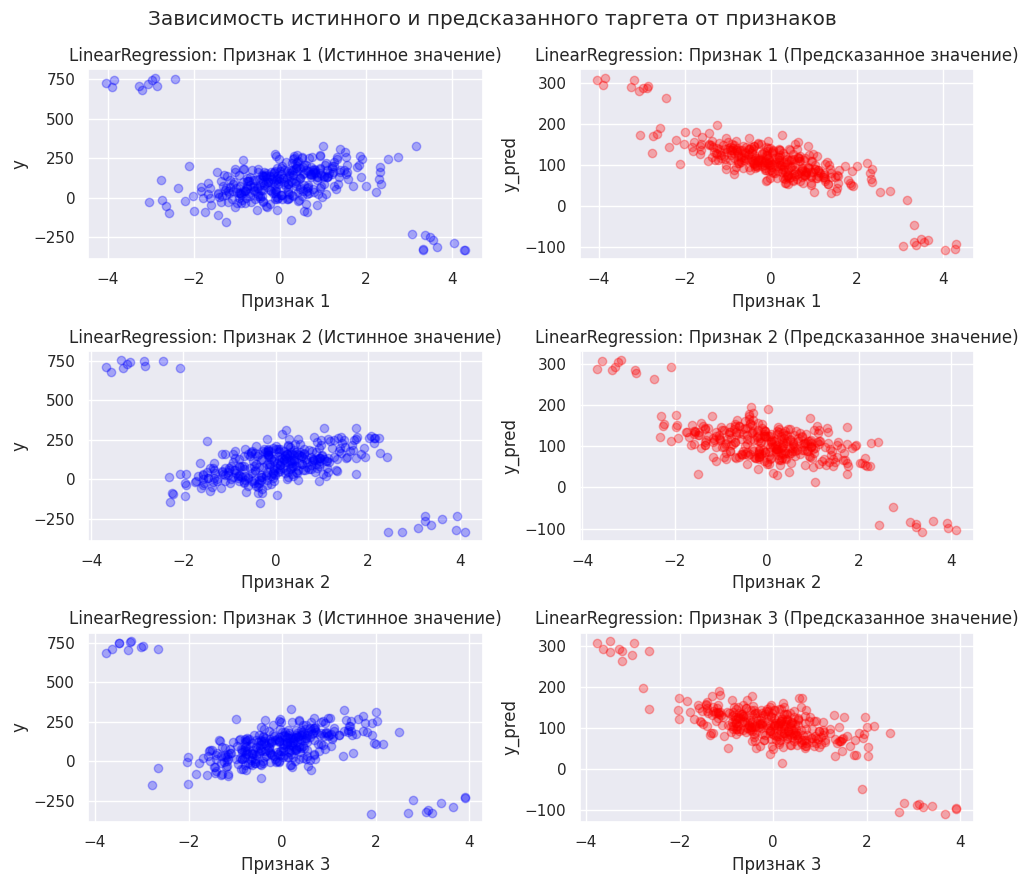

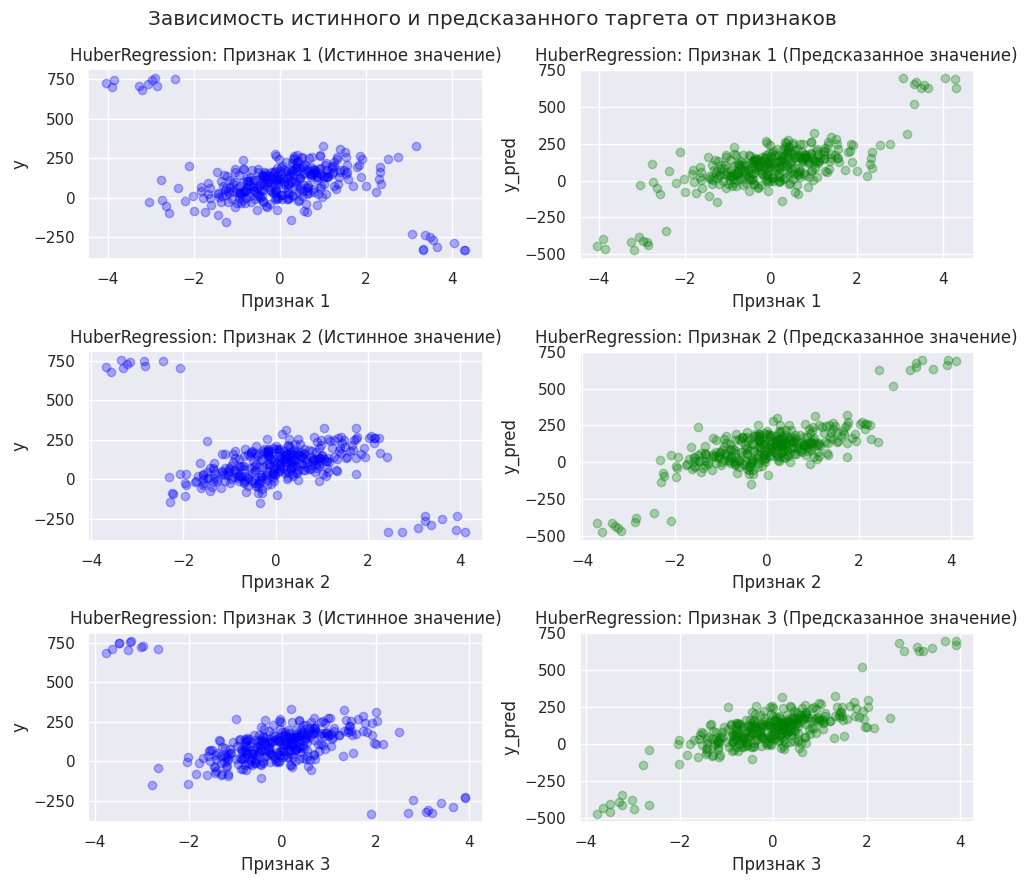

In [27]:
alpha = 0.3
y_pred_lr = lin_model.predict(X)
y_pred_hr = huber_model.predict(X)

tmp_X = np.array(X)

n_features = tmp_X.shape[1]

fig, axs = plt.subplots(n_features, 2, figsize=(10, n_features*3))
fig.suptitle('Зависимость истинного и предсказанного таргета от признаков')

for i in range(n_features):
    axs[i, 0].scatter(tmp_X[:, i], y, color='blue', label='Истинные значения', alpha=alpha)
    axs[i, 0].set_title(f'LinearRegression: Признак {i+1} (Истинное значение)')
    axs[i, 0].set_xlabel(f'Признак {i+1}')
    axs[i, 0].set_ylabel('y')

    axs[i, 1].scatter(tmp_X[:, i], y_pred_lr, color='red', label='Предсказанные значения', alpha=alpha)
    axs[i, 1].set_title(f'LinearRegression: Признак {i+1} (Предсказанное значение)')
    axs[i, 1].set_xlabel(f'Признак {i+1}')
    axs[i, 1].set_ylabel('y_pred')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(n_features, 2, figsize=(10, n_features*3))
fig.suptitle('Зависимость истинного и предсказанного таргета от признаков')

for i in range(n_features):
    axs[i, 0].scatter(tmp_X[:, i], y, color='blue', label='Истинные значения', alpha=alpha)
    axs[i, 0].set_title(f'HuberRegression: Признак {i+1} (Истинное значение)')
    axs[i, 0].set_xlabel(f'Признак {i+1}')
    axs[i, 0].set_ylabel('y')

    axs[i, 1].scatter(tmp_X[:, i], y_pred_hr, color='green', label='Предсказанные значения', alpha=alpha)
    axs[i, 1].set_title(f'HuberRegression: Признак {i+1} (Предсказанное значение)')
    axs[i, 1].set_xlabel(f'Признак {i+1}')
    axs[i, 1].set_ylabel('y_pred')

plt.tight_layout()
plt.show()

Видим, что регрессия Хубера лучше прогнозирует истинные значения, за исключением явных выбросов, чем линейная регрессия. 

**Вывод:** В задаче мы построили класс регрессии Хубера, и на практике подтвердили, что регрессия Хубера устойчива к выбросам. Также в очередной раз применили на практике поиск наилучших гиперпараметров.